# **Global Layoff Trends**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import files
uploaded = files.upload()

Saving layoffs.csv to layoffs.csv


# 1. Data Overview and Exploration

In [4]:
df = pd.read_csv("layoffs.csv")
df.head()


,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,WiseTech,"Sydney,Non-U.S.",NaN,7/23/2025,NaN,Logistics,https://www.reuters.com/world/asia-pacific/aus...,Post-IPO,$3000,Australia,7/24/2025
1,ConsenSys,New York City,47.0,7/22/2025,7%,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,$726,United States,7/22/2025
2,Zeen,SF Bay Area,NaN,7/21/2025,100%,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,$9,United States,7/22/2025
3,Rocket Companies,Detroit,NaN,7/18/2025,2%,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,$5200,United States,7/22/2025
4,Amazon,Seattle,NaN,7/17/2025,NaN,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,$8100,United States,7/18/2025


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4115 non-null   object 
 1   location             4114 non-null   object 
 2   total_laid_off       2682 non-null   float64
 3   date                 4115 non-null   object 
 4   percentage_laid_off  2619 non-null   object 
 5   industry             4114 non-null   object 
 6   source               4112 non-null   object 
 7   stage                4108 non-null   object 
 8   funds_raised         3663 non-null   object 
 9   country              4113 non-null   object 
 10  date_added           4115 non-null   object 
dtypes: float64(1), object(10)
memory usage: 353.8+ KB


In [6]:
df.describe()

,total_laid_off
count,2682.000000
mean,283.140194
std,977.184581
min,3.000000
25%,40.000000
50%,85.000000
75%,200.000000
max,22000.000000


In [ ]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,WiseTech,"Sydney,Non-U.S.",NaN,7/23/2025,NaN,Logistics,https://www.reuters.com/world/asia-pacific/aus...,Post-IPO,$3000,Australia,7/24/2025
1,ConsenSys,New York City,47.0,7/22/2025,7%,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,$726,United States,7/22/2025
2,Zeen,SF Bay Area,NaN,7/21/2025,100%,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,$9,United States,7/22/2025
3,Rocket Companies,Detroit,NaN,7/18/2025,2%,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,$5200,United States,7/22/2025
4,Amazon,Seattle,NaN,7/17/2025,NaN,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,$8100,United States,7/18/2025


In [ ]:
print("Rows, Columns:", df.shape)
df.columns

Rows, Columns: (4115, 11)


Index(['company', 'location', 'total_laid_off', 'date', 'percentage_laid_off',
       'industry', 'source', 'stage', 'funds_raised', 'country', 'date_added'],
      dtype='object')

# 2. Data Cleaning

**Find the missing values**

In [ ]:
df.isnull().sum()


,0
company,0
location,1
total_laid_off,1433
date,0
percentage_laid_off,1496
industry,1
source,3
stage,7
funds_raised,452
country,2


funds_raised	~70%	: There are too many missing values, so I will create a filtered version of that column.   
total_laid_off	~4%	 I have dropped this column.  
stage	< 1%
source	< 1%	  
location, industry, country	< 0.1%

**funds_raised column**

In [ ]:
# I created a filtered version of the funds_raised column for side analysis as quite a lot of the data was missing
df_funding = df[df['funds_raised'].notnull()]

In [ ]:
df.columns = df.columns.str.strip().str.lower()

**total_laid_off column**  
Since I can't impute this easily, I have dropped the null rows

In [ ]:
df = df.dropna(subset=['total_laid_off'])

**stage and source columns**  
Since the missing values in these columns are very few, I am replacing it with 'Unknown'

In [7]:
df = df.copy()

In [8]:
df['stage'] = df['stage'].fillna('Unknown')
df['source'] = df['source'].fillna('Unknown')

**location, industry and country columns**  
Since the missing values in these columns are very few, I am replacing it with 'Unknown' since these columns are important for futher insights.

In [9]:
df['location'] = df['location'].fillna('Unknown')
df['industry'] = df['industry'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

**Checking for Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['date_added'] = pd.to_datetime(df['date_added'])

In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [12]:
# Removing $ from the records of funds_raised
df['funds_raised'] = df['funds_raised'].str.replace('[\$,]', '', regex=True)

In [ ]:
# Remove '%' and convert to float
df['percentage_laid_off'] = df['percentage_laid_off'].str.rstrip('%').astype(float) / 100

# 3. Exploratory Data Analysis

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


**1. Layoffs per Year**

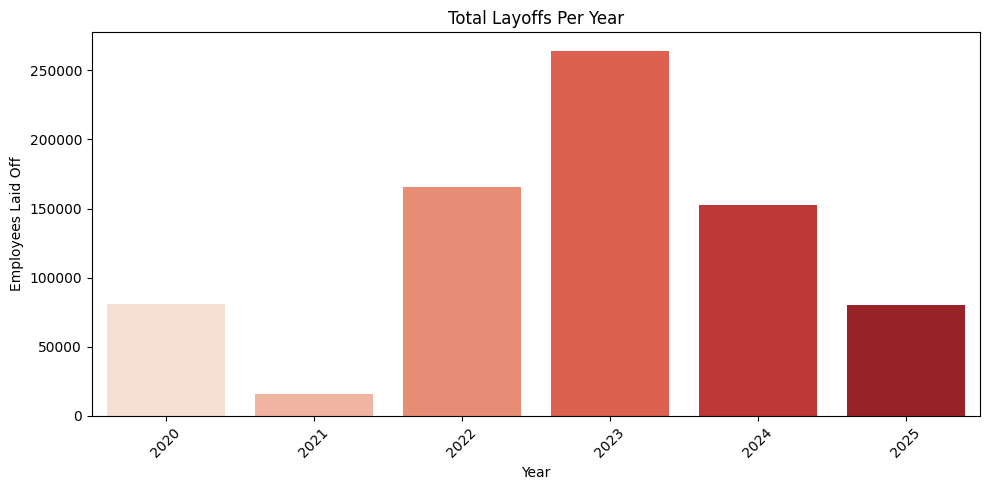

In [14]:
df['year'] = df['date'].dt.year
layoffs_by_year = df.groupby('year')['total_laid_off'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=layoffs_by_year, x='year', y='total_laid_off', palette='Reds')
plt.title("Total Layoffs Per Year")
plt.ylabel("Employees Laid Off")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**INSIGHTS:**  
2023 saw the highest number of layoffs, peaking at over 260,000 employees laid off — a significant spike compared to previous and following years.

There was a sharp rise from 2021 to 2022, followed by an even steeper jump into 2023, likely due to post-COVID correction, over-hiring during the pandemic, and economic tightening (interest rate hikes, investor pullback).

2024 shows a slight decline, but layoffs remained relatively high — indicating ongoing restructuring.

2025 shows signs of stabilization, with layoffs reducing to levels similar to 2020, suggesting potential recovery or better adaptation by tech firms.

**2. Layoffs by Industry**

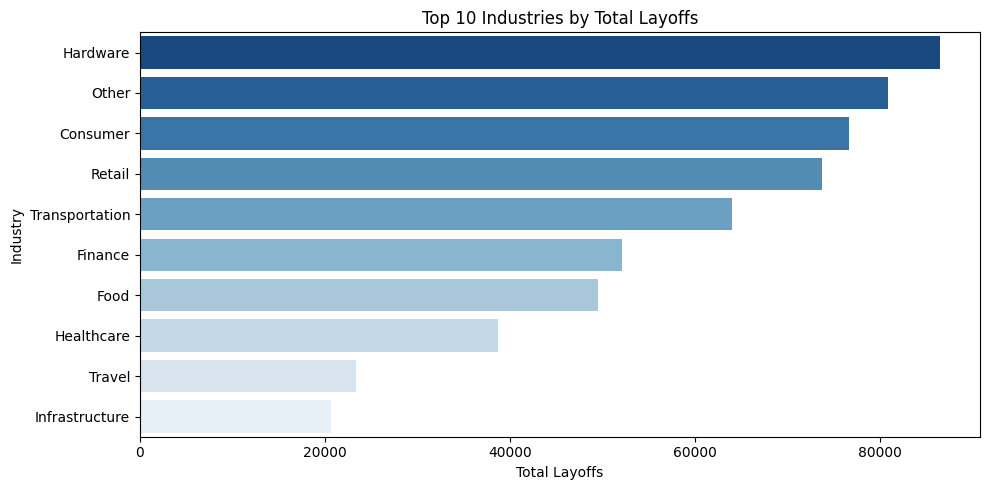

In [15]:
top_industries = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_industries.values, y=top_industries.index, palette='Blues_r')
plt.title("Top 10 Industries by Total Layoffs")
plt.xlabel("Total Layoffs")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


**INSIGHTS:**  

**Hardware:**  
Most layoffs, likely due to overproduction during the pandemic and post-COVID demand drop.

**Other:**  
Includes mixed-model startups or uncategorized firms.

**Consumer:**  
High layoffs due to reduced spending, B2C funding crunch, and shifting post-pandemic focus.

**Retail:**  
Overhiring during e-commerce boom led to corrections and workforce cuts.

**Transportation:**   
Volatile fuel prices and supply chain shifts caused sector instability and layoffs.

**Finance:**   
Fintechs expanded too fast during funding highs and scaled back in tougher markets.

**Food:**   
COVID-driven overexpansion in food delivery saw declines post-pandemic, triggering cuts.

**Healthcare:**   
Health-tech startups laid off staff after pandemic momentum faded.

**Travel:**  
Travel was hit hardest in the years 2020–21, and the layoffs reflect the long recovery path for that industry.

**Infrastructure:**  
This had the least layoffs among the top 10. It might be because infrastructure projects tend to have longer timelines and more stability, especially if tied to government.

**3. Layoffs by Company**

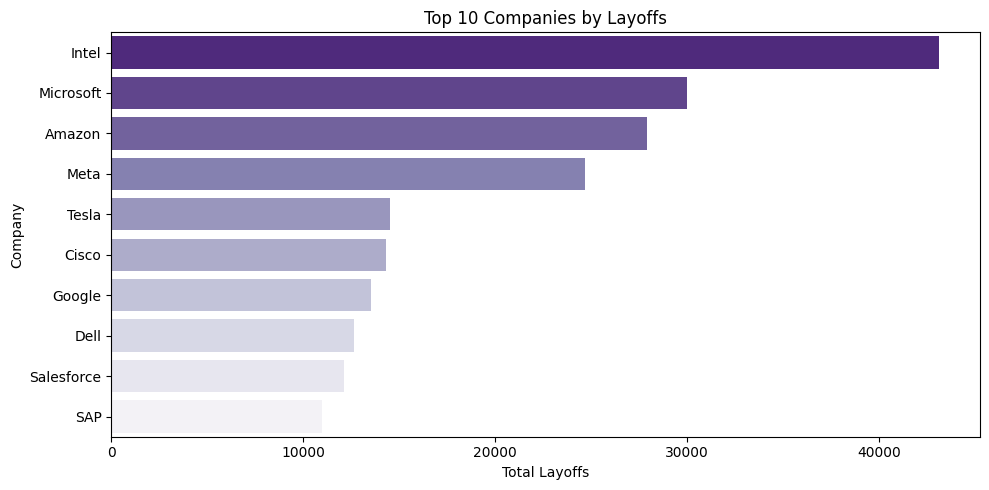

In [16]:
top_companies = df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Purples_r')
plt.title("Top 10 Companies by Layoffs")
plt.xlabel("Total Layoffs")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


**INSIGHTS:**  

Intel laid off the most people, probably because of the chip market slowdown and internal changes.  

Big tech companies like Microsoft, Amazon and Meta also had major layoffs, possibly to fix overhiring during the pandemic.

Tesla, Cisco and Google seemed to cut jobs to manage costs or deal with changing demand.

Even companies like Salesforce and SAP downsized a bit, mostly to improve profits after scaling too fast.

**4. Top 10 Countries by Total Layoffs**

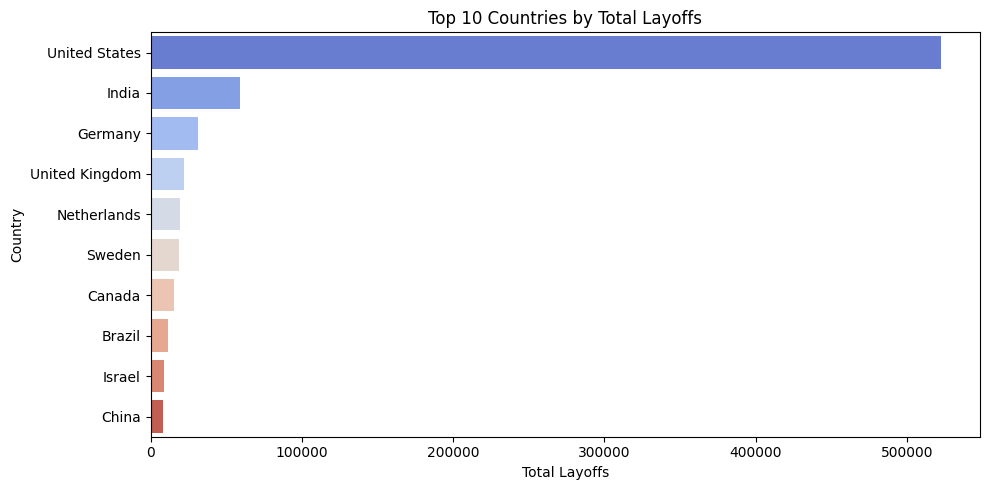

In [17]:
top_countries = df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Total Layoffs")
plt.xlabel("Total Layoffs")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


**INSIGHTS:**  

The United States is clearly ahead in terms of layoff numbers, it is way ahead of every other country. India is second, but the difference between them is huge.    


This shows how layoffs have been heavily concentrated in the U.S, probably because a large number of global tech giants have their headquarters there and were hit harder.

**5. Company Stage vs Layoffs**

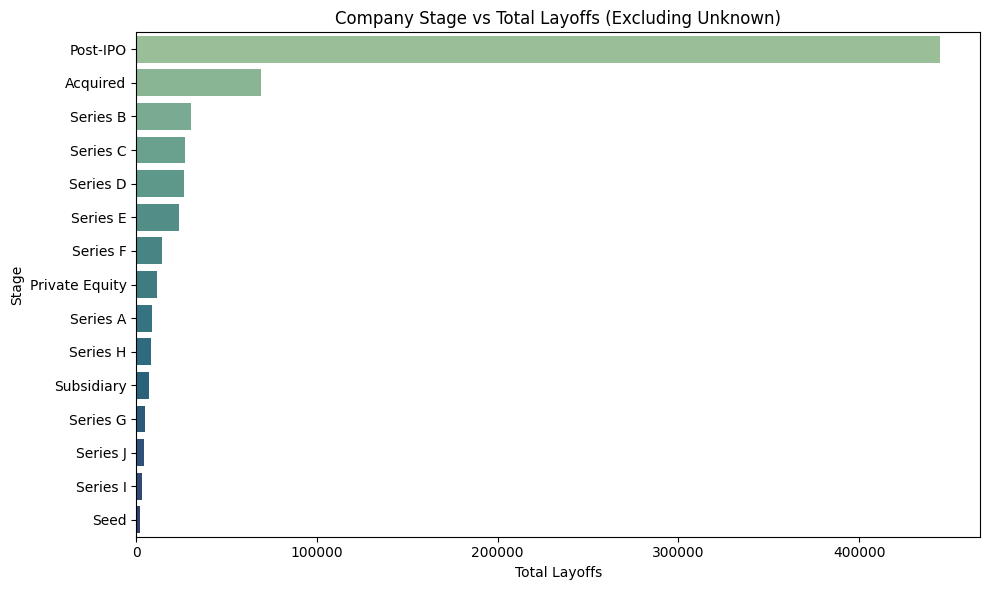

In [18]:
# Remove unknowns for clean analysis
df_stage = df[df['stage'].str.lower() != 'unknown']

# Recalculate after filtering
stage_layoffs_filtered = df_stage.groupby('stage')['total_laid_off'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=stage_layoffs_filtered.values, y=stage_layoffs_filtered.index, palette='crest')
plt.title("Company Stage vs Total Layoffs (Excluding Unknown)")
plt.xlabel("Total Layoffs")
plt.ylabel("Stage")
plt.tight_layout()
plt.show()


**INSIGHTS:**  

Most layoffs occurred in Post-IPO companies, followed by those that were Acquired and then late-stage funding rounds like Series B to F. This shows that larger startups and public companies are have the majority of workforce cuts, possibly due to overhiring during growth periods or pressure from investors to cut costs.

On the other hand, early-stage companies (Seed, Series A) show minimal layoffs, likely due to smaller teams and cautious hiring.

**6. Layoffs over time**

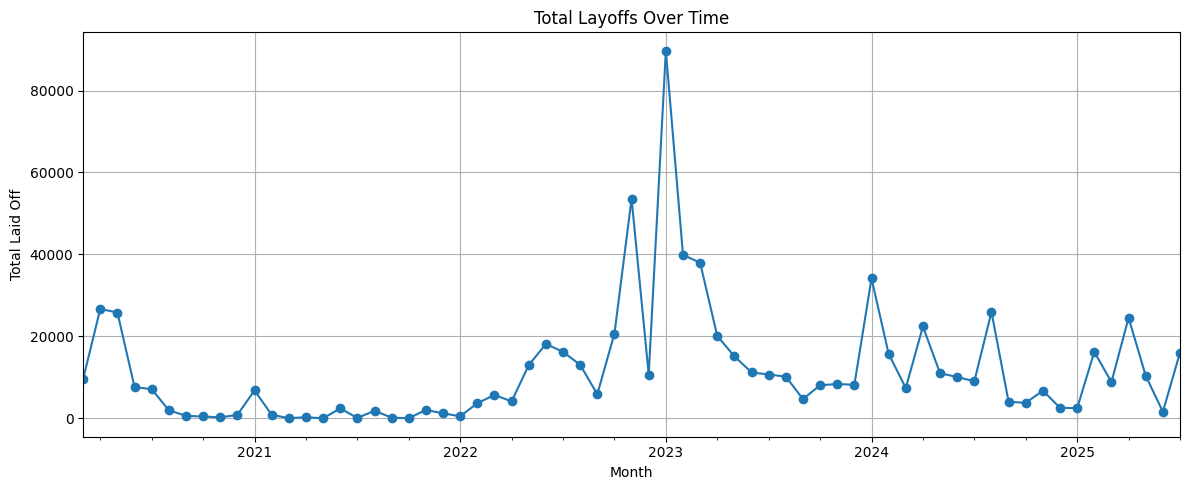

In [19]:
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')
monthly_layoffs = df.groupby('year_month')['total_laid_off'].sum()

monthly_layoffs.plot(kind='line', figsize=(12,5), marker='o')
plt.title('Total Layoffs Over Time')
plt.xlabel('Month')
plt.ylabel('Total Laid Off')
plt.grid(True)
plt.tight_layout()
plt.show()


**INSIGHTS:**  

Layoffs peaked dramatically in early 2023, with over 85,000 employees laid off in a single month, likely due to post-pandemic period.

After that spike, layoffs gradually decreased but still show some instability.

**7. The distribution of layoff percentages**

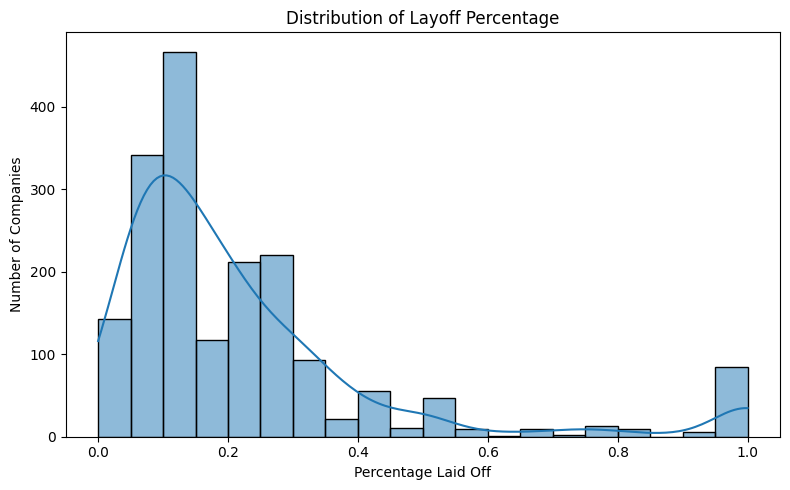

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['percentage_laid_off'].dropna(), bins=20, kde=True)
plt.title("Distribution of Layoff Percentage")
plt.xlabel("Percentage Laid Off")
plt.ylabel("Number of Companies")
plt.tight_layout()
plt.show()


**INSIGHTS:**  

Most companies laid off less than 30% of their workforce, the peak is around the 10–20% range.

However, there’s a long tail, which means that a few companies laid off a large portion of their staff, indicating company shutdowns or major crises.

**8. Correlation Between Numeric Features**

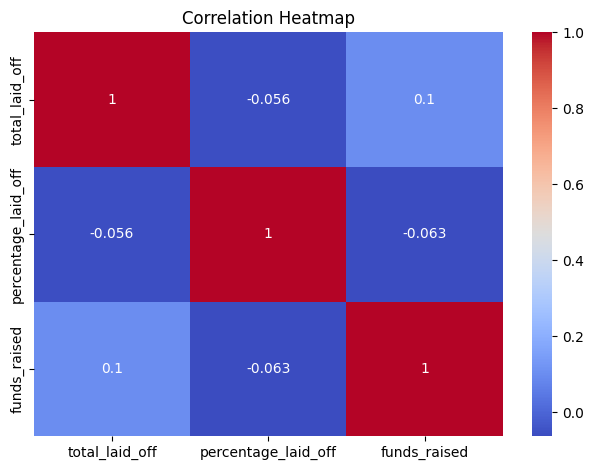

In [ ]:
sns.heatmap(df[['total_laid_off', 'percentage_laid_off', 'funds_raised']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


The heatmap shows that:

*   The correlation between total layoffs and funds raised is very weak (0.10).

*   The correlation between layoff percentage and funds raised is slightly negative (-0.06).

*   There is also a very weak inverse relationship between total laid off and percentage laid off, suggesting different scales of operations.


High funding does not guarantee job security as companies with large capital can still lay off employees.

# **Overall Insight**

From 2020–2025, layoffs rose and fell in a clear cycle, mainly driven by pandemic overhiring, changing demand and a weaker economy. Numbers jumped sharply from 2021, peaking in early 2023 with over 260,000 jobs lost, including 85,000 in one month as companies scaled back after the pandemic and dealt with higher interest rates and less funding. Layoffs dropped in 2024 but stayed high, then returned to near-2020 levels in 2025.



The most affected sectors were hardware, consumer, retail and transportation, while infrastructure stayed steady. Most job cuts happened in post-IPO and late-stage startups, often due to investor pressure. Smaller early-stage companies were mostly spared. The U.S. saw the most layoffs by far, followed by India, with big cuts from Intel, Microsoft, Amazon and Meta. Most companies cut less than 30% of staff, but some had massive layoffs or shut down entirely.



Funding had a slight link to job security, showing that even well-funded companies made cuts. Overall, the data shows a market correction where larger and more established firms took the biggest hit, with signs of steadier hiring and growth by 2025.